## Cleaning Data
**Menggunakan** :
- Fungsi Log untuk mentranformasi Data
- Melakukan antisipasi pada data yang duplikat
- Antisipasi terhadap nilai yang hilang
- Standarisasi dan normalisasi data
- Antisipasi Outliers

### Import Library
- `pandas` untuk memanage data
- `numpy` untuk melakukan operasi matematika
- `seaborn` untuk memvisualisasikan data
- `matplotlib` untuk memvisualisasikan data
- `sklearn` untuk machine learning dan pipelinenya
- `scipy` untuk komputasi metode statistika

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy .stats import norm
from scipy import stats

### Load Data

In [3]:
housing = pd.read_csv("Ames_Housing_Data1.tsv", sep='\t')
housing.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


Melihat informasi dari setiap feature menggunakan `info()`

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

harusnya ada 2931 baris dari tiap data yang menunjukan adanya nilai jika tidak maka di feature itu terdapat data yang hilang
'SalePrice' adalah feture labe / target yang akan menjadi variabel terikat dan sisanya akan menjadi variabel pengaruh/prediktor

In [5]:
housing["SalePrice"].describe()

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Data tersebut bisa dilihat bahwa:
- nilai minimum sangat berbeda jauh dengan nilai quartile 1
- nilai max juga sangat berbeda jauh dibanding nilai quartile 3
- asumsinya ada outlier didalam feture ini

In [6]:
# Mencari ffeature kategori pada feature 'Sale Condition'
housing["Sale Condition"].value_counts()

Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale Condition, dtype: int64

### Mencari Korelasi antar Feature
MEnentukan korelasi semua variabel terhadap variabel target (SalePrice) karena mungkin beberapa dari itu memiliki korelasi yang signifikan terhap target
- bisa menggunakan sctter plot, heatmaps
- akan emnggunakan matriks korelasi `corr()` yang berbasis koefisien pearson correlation
- karena mampu mengukur seberapa kemiripan antar dua variabel
- korelasi hanya bisa dilakukan apabila variabel variabelnya merupakan tipe float dan integers, karena hanya numerical variabel yang akan dieksekusi

In [7]:
#Memilih variabel yang hanya bertipe foalt dan int
house_num = housing.select_dtypes(include = ['float64', 'int64'])
house_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   Lot Frontage     2441 non-null   float64
 4   Lot Area         2931 non-null   int64  
 5   Overall Qual     2931 non-null   int64  
 6   Overall Cond     2931 non-null   int64  
 7   Year Built       2931 non-null   int64  
 8   Year Remod/Add   2931 non-null   int64  
 9   Mas Vnr Area     2908 non-null   float64
 10  BsmtFin SF 1     2930 non-null   float64
 11  BsmtFin SF 2     2930 non-null   float64
 12  Bsmt Unf SF      2930 non-null   float64
 13  Total Bsmt SF    2930 non-null   float64
 14  1st Flr SF       2931 non-null   int64  
 15  2nd Flr SF       2931 non-null   int64  
 16  Low Qual Fin SF  2931 non-null   int64  
 17  Gr Liv Area   

In [8]:
#Membuat korelasi
house_num_corr = house_num.corr()["SalePrice"][:-1] 
#-1 artinya baris terakhir adalah SalePrice

In [9]:
house_num_corr

Order             -0.031644
PID               -0.246617
MS SubClass       -0.085206
Lot Frontage       0.357141
Lot Area           0.266600
Overall Qual       0.799226
Overall Cond      -0.101763
Year Built         0.558340
Year Remod/Add     0.532664
Mas Vnr Area       0.508277
BsmtFin SF 1       0.432950
BsmtFin SF 2       0.005848
Bsmt Unf SF        0.182808
Total Bsmt SF      0.632270
1st Flr SF         0.621672
2nd Flr SF         0.269222
Low Qual Fin SF   -0.037673
Gr Liv Area        0.706791
Bsmt Full Bath     0.276144
Bsmt Half Bath    -0.035870
Full Bath          0.545339
Half Bath          0.284909
Bedroom AbvGr      0.143934
Kitchen AbvGr     -0.119839
TotRms AbvGrd      0.495500
Fireplaces         0.474481
Garage Yr Blt      0.526808
Garage Cars        0.647891
Garage Area        0.640411
Wood Deck SF       0.327220
Open Porch SF      0.312970
Enclosed Porch    -0.128833
3Ssn Porch         0.032209
Screen Porch       0.112104
Pool Area          0.068392
Misc Val          -0

In [10]:
# Mencari nilai korelasi yang signifikan memperngaruhi SalePrice
# mencari yang mempunyai korelasi > 0.5 
# Tidak masalah apakah dia negatif atau positif maka menggunakan
# `abs()` untuk mengeneralisir

top_features = house_num_corr[abs(house_num_corr)>0.5].sort_values(ascending=False)
#Menampilkan korelasi pearson yang memiliki nilai lebih dari 0.5

print("Ada {} feature yang memiliki korelasi tinggi terhadap label 'SalePrice', diantaranya yaitu :\n{}"
     .format(len(top_features), top_features))

Ada 11 feature yang memiliki korelasi tinggi terhadap label 'SalePrice', diantaranya yaitu :
Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64


Melakukan Visualisasi korelasi antara fitur dan target variabel. menggunakan fungsi `sns.pairplot()` untuk analisis. Juga membanung pair plot adalah salah satu langkah yang mungkin dilakukan untuk menemukan outlier yang ada dalam data

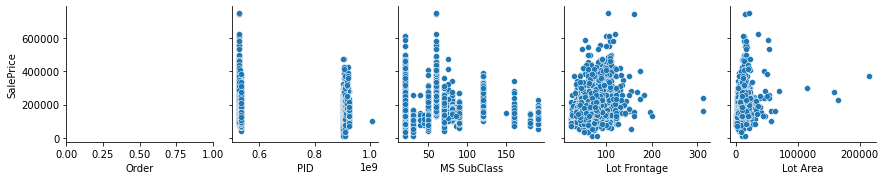

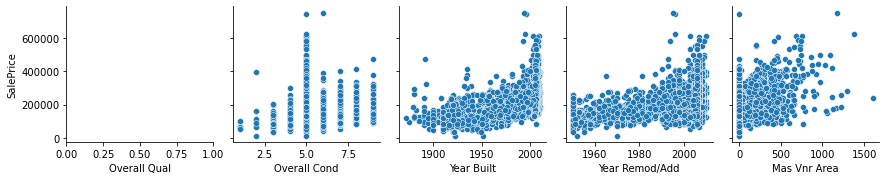

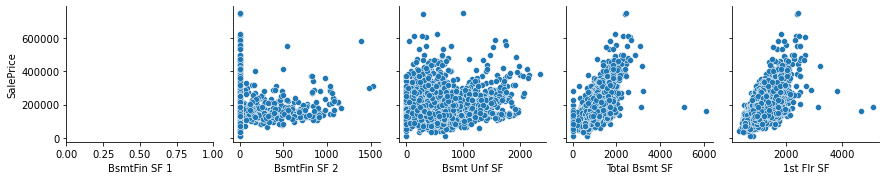

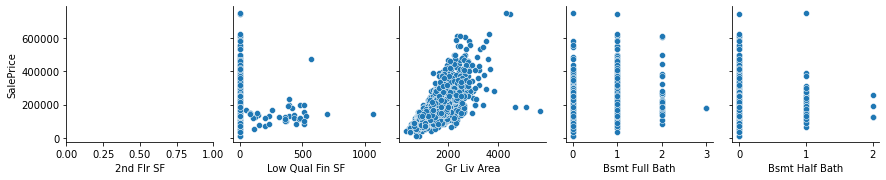

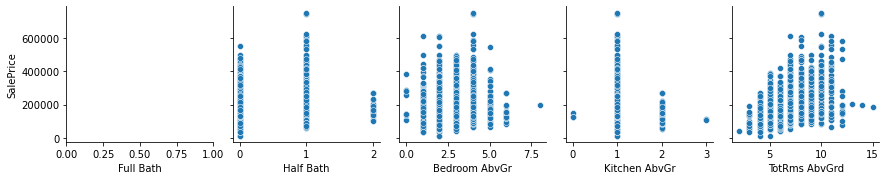

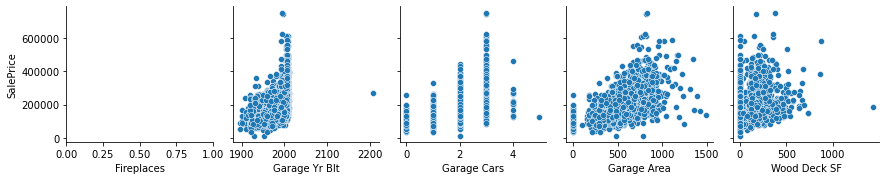

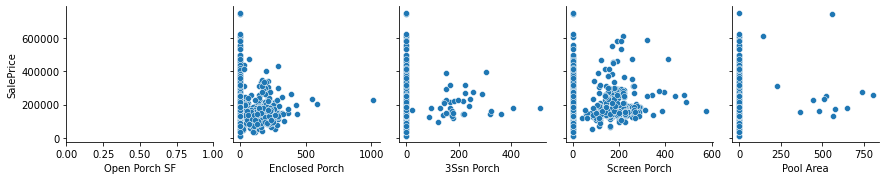

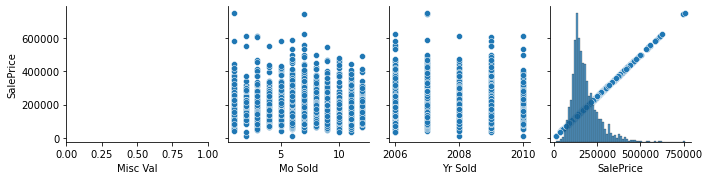

In [11]:
for i in range(0, len(house_num.columns), 5):
    sns.pairplot(data=house_num,
                x_vars=house_num.columns[i:i+5],
                y_vars=["SalePrice"])

maka kita bisa simpulkan bahwa fitur fitur yang sangat berkorelasi kuat dengan target "SalePrice " adalah "Overall Qual", "Gr Liv Area", "Garage Cars", "Garage Area" dan lain lain

### Melakukan Tranformasi
Mencoba mengunakan log transform
> Menggunakan `displot()` untuk memvisualisasikan distribusi data SalePrice

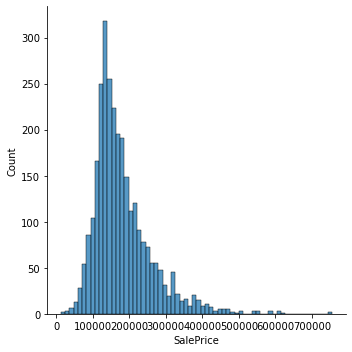

In [12]:
sp_untransformed = sns.displot(housing["SalePrice"])

<AxesSubplot:>

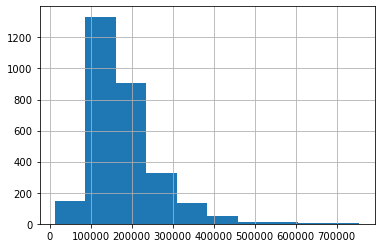

In [13]:
housing["SalePrice"].hist()

Kedua grafik tersebut sama menjelaskan adanya kemiringan data yang cenderung ke kanan (right tail)

Untuk melihat seberapa besar level skew (kemiringan dari `Saleprice` kita gunakan fungsi `skew()`

In [14]:
print("Skewness : %f" % housing["SalePrice"].skew())

Skewness : 1.743222


jika nilai skew:
- skewd diantara -0.5 sampai 0.5 maka distribusi cenderung simetri
- antara 0.5 sampai 1 baik negatif atau positif ini cenderung moderate skew
- jika lebih dari 1 maka data higly skew

maka kita akan mencoba mentranformasikan datanya menggunakan `np.log`

In [15]:
log_transformed = np.log(housing["SalePrice"])

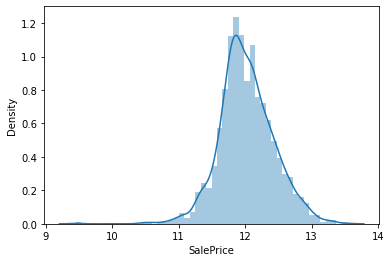

In [16]:
sp_transformed = sns.distplot(log_transformed)

In [17]:
print("Skewness : ", log_transformed.skew())

Skewness :  -0.015353828434352058


sekarang saleprice memiliki skewnes 0.01

adapun tranformasi lain seperti menggunakan 
- `np.sqrt`
- menggunakan boxcos dari `stats.boxcox` dari library `scipy stats`

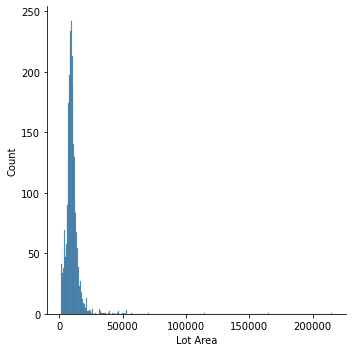

In [20]:
# latihan coba plot feature LotArea
#dan tranformaiskan ke log jika ada skewnes
LA_untransformed = sns.displot(housing["Lot Area"])

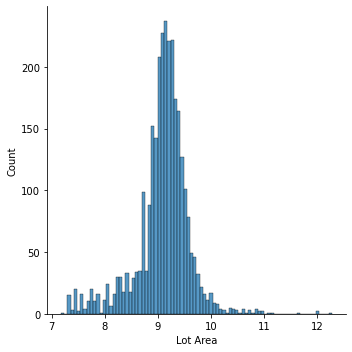

In [21]:
LA_transformed = sns.displot(np.log(housing["Lot Area"]))

In [27]:
print("Tingkat Skewnessnya : ", np.log(housing["Lot Area"]).skew())

Tingkat Skewnessnya :  -0.49463880686275796


### Antisipasi Duplikasi
menggunakan `duplicated()`

In [28]:
duplicate = housing[housing.duplicated(["PID"])]
duplicate

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


ada satu duplikasi baris pada dataset ini maka kita bisa membuangnya dengan menggunakan `drop_duplicates()`
secata default dia akan membuang semua baris nya

In [29]:
dup_removed = housing.drop_duplicates()
dup_removed

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [31]:
# mengecek apakah dataset mengandung duplikasi 
#dgn melihat apakah data sudah unique semua
housing.index.is_unique

True

In [32]:
duplicate = housing[housing.duplicated(["Order"])]
duplicate

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


In [33]:
dup_removed2 = housing.drop_duplicates()
dup_removed2

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [36]:
s= housing.drop_duplicates()
s.shape

(2930, 82)

### Antisipasi nilai yang hilang
bisa menggunakan 
- isna()
- isnull()
- notna()

To summarize all the missing values in our dataset, we will use `isnull()` function. Then, we will add them all up, by using `sum()` function, sort them with `sort_values()` function, and plot the first 20 columns (as the majority of our missing values fall within first 20 columns)

untuk visualisasi bisa menggunakan ` bar plot` dari `matplotlib`

In [39]:
total = housing.isnull().sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Total Missing Value : ')

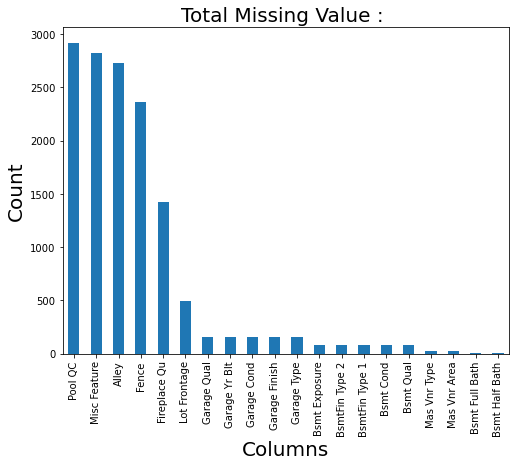

In [42]:
lect = total.head(20)
lect.plot(kind='bar', figsize=(8,6), fontsize=10)
plt.xlabel("Columns", fontsize=20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value : ", fontsize=20)

drop missing value dengan `dropna()`

In [43]:
# example di kolom lot Frontage
housing.dropna(subset=["Lot Frontage"])

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2925,923251180,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [45]:
# menghapus kolom
housing.drop("Lot Frontage", axis = 1)

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


bisa mengisi missing value dengan median mean atau yg lain menggunakan
- `fillna()`

In [47]:
median = housing["Lot Frontage"].median()
median

68.0

In [48]:
housing["Lot Frontage"].fillna(median, inplace = True)

In [49]:
housing.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,68.0,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2930,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


index 2927 diisi dengan nilai median yang awalnya NAN

In [51]:
# coba menggunakan kolom "Mas Vnr Area"
housing["Mas Vnr Area"].isnull().sum()

23

ada 23 missing values

In [52]:
# mengganti missing value pada Mas Vnr 
# dengan mean Mas Vnr
mean_Vnr = housing["Mas Vnr Area"].mean()
mean_Vnr

101.9002751031637

In [54]:
housing["Mas Vnr Area"].fillna(mean_Vnr, inplace = True)

In [55]:
# Cek lagi nilai missing valuenya
housing["Mas Vnr Area"].isnull().sum()

0

## Feature Scalling
Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.

Scikit-learn library provides `MinMaxScaler` for normalization and `StandardScaler` for standardization needs. For more information on `scikit-learn` [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) and [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) please visit their respective documentation websites.

In [56]:
# normalisasi data (hanya data dengan tipe numerik)
norm_data = MinMaxScaler().fit_transform(house_num)

In [57]:
norm_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [3.41413452e-04, 1.01788895e-04, 0.00000000e+00, ...,
        4.54545455e-01, 1.00000000e+00, 1.24238256e-01],
       ...,
       [9.99317173e-01, 8.25914814e-01, 3.82352941e-01, ...,
        5.45454545e-01, 0.00000000e+00, 1.60616051e-01],
       [9.99658587e-01, 8.27370610e-01, 0.00000000e+00, ...,
        2.72727273e-01, 0.00000000e+00, 2.11814430e-01],
       [1.00000000e+00, 8.27476641e-01, 2.35294118e-01, ...,
        9.09090909e-01, 0.00000000e+00, 2.36066294e-01]])

In [58]:
# Scaling data
scaled_data = StandardScaler().fit_transform(house_num)
scaled_data

array([[-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.72909781, -0.99656498, -0.87674019, ..., -0.07945953,
         1.67740664, -0.94923488],
       ...,
       [ 1.729097  ,  1.10758639,  0.64804102, ...,  0.2890466 ,
        -1.36026952, -0.61115139],
       [ 1.73027889,  1.11129572, -0.87674019, ..., -0.81647179,
        -1.36026952, -0.13533019],
       [ 1.73146077,  1.11156589,  0.06158671, ...,  1.76307112,
        -1.36026952,  0.09005881]])

In [66]:
scaled_sprice = StandardScaler().fit_transform(housing['SalePrice'][:,np.newaxis]) 
scaled_sprice

array([[ 0.4281423 ],
       [ 0.4281423 ],
       [-0.94923488],
       ...,
       [-0.61115139],
       [-0.13533019],
       [ 0.09005881]])

In [67]:
print('\t y')

	 y


## Antisipasi Outliers
menggunakan `boxplot`

<AxesSubplot:xlabel='Lot Area'>

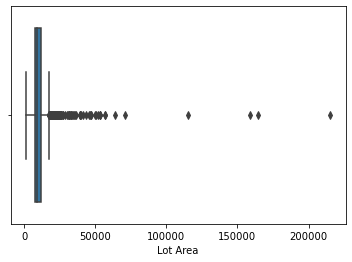

In [68]:
sns.boxplot(x=housing["Lot Area"])

<AxesSubplot:xlabel='SalePrice'>

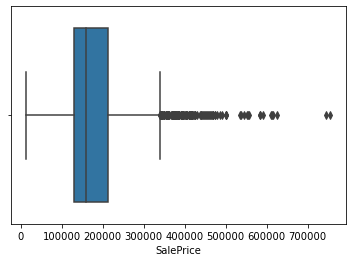

In [69]:
sns.boxplot(x=housing["SalePrice"])

## Bivariate Analysis

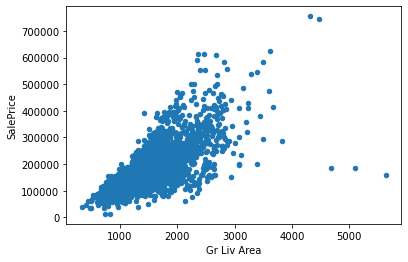

In [73]:
price_area = housing.plot.scatter(x='Gr Liv Area',
                      y='SalePrice')

### Hapus outliers

In [74]:
housing.sort_values(by = 'Gr Liv Area', ascending = False)[:2]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1499,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2181,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850


In [75]:
outliers_dropped = housing.drop(housing.index[[1499,2181]])

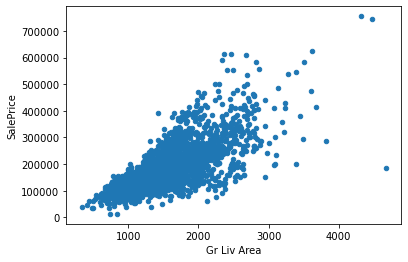

In [76]:
new_plot = outliers_dropped.plot.scatter(x='Gr Liv Area',
                                         y='SalePrice')

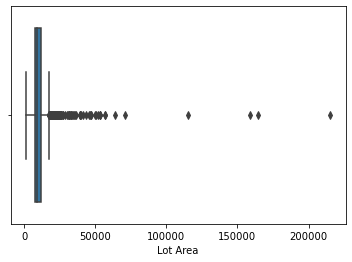

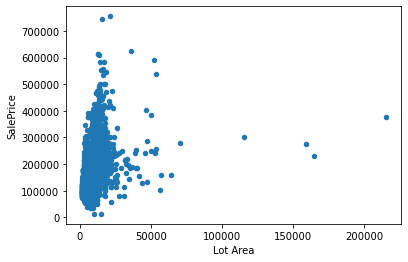

In [80]:
# coba untuk kolom Lot Area
sns.boxplot(x=housing['Lot Area'])
price_lot = housing.plot.scatter(x='Lot Area', y='SalePrice')   
housing['Lot_Area_Stats'] = stats.zscore(housing['Lot Area'])
housing[['Lot Area','Lot_Area_Stats']].describe().round(3)
housing.sort_values(by = 'Lot Area', ascending = False)[:1]
lot_area_rem = housing.drop(housing.index[[957]])

There seems to be one outlier, the very last point in the 'Lot Area' is too far from the rest of the group. Also, according to the Z-score, the standard deviation of that point exceeds the threshhold of 3.

## Z-Score Analysis
Z-score is another way to identify outliers mathematically. Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In another words, Z-score is the value that quantifies relationship between a data point and a standard deviation and mean values of a group of points. Data points which are too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used. For example, if the Z-score value is greater than or less than 3 or -3 standard deviations respectively, that data point will be identified as a outlier.

To learn more about Z-score, please visit this [Wikipedia](https://en.wikipedia.org/wiki/Standard_score?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) site.


Below, we are using Z-score function from `scipy` library to detect the outliers in our 'Low Qual Fin SF' parameter. To learn more about `scipy.stats`, please visit this [link](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [81]:
housing['LQFSF_Stats'] = stats.zscore(housing['Low Qual Fin SF'])
housing[['Low Qual Fin SF','LQFSF_Stats']].describe().round(3)

,Low Qual Fin SF,LQFSF_Stats
count,2931.000,2931.000
mean,4.675,-0.000
std,46.303,1.000
min,0.000,-0.101
25%,0.000,-0.101
50%,0.000,-0.101
75%,0.000,-0.101
max,1064.000,22.882


The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 22.882 is further proof of the presence of outliers, as it falls well above the z-score limit of +3